In [1]:
from matplotlib import pyplot as plt
import xarray as xr

## Get small NEMO test data set

In [2]:
!mkdir -p NEMO_GYRE_test_data
!curl https://zenodo.org/record/3634491/files/NEMO_GYRE_test_data_all_files.v2020.02.03.1.zip > NEMO_GYRE_test_data_all_files.v2020.02.03.1.zip
!unzip -o NEMO_GYRE_test_data_all_files.v2020.02.03.1.zip -d NEMO_GYRE_test_data
!ls -la NEMO_GYRE_test_data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.7M  100 19.7M    0     0  7390k      0  0:00:02  0:00:02 --:--:-- 7387k
Archive:  NEMO_GYRE_test_data_all_files.v2020.02.03.1.zip
  inflating: NEMO_GYRE_test_data/GYRE_5d_00010101_00011230_grid_T.nc  
  inflating: NEMO_GYRE_test_data/GYRE_5d_00010101_00011230_grid_U.nc  
  inflating: NEMO_GYRE_test_data/GYRE_5d_00010101_00011230_grid_V.nc  
  inflating: NEMO_GYRE_test_data/GYRE_5d_00010101_00011230_grid_W.nc  
  inflating: NEMO_GYRE_test_data/mesh_mask.nc  
total 20944
drwxr-xr-x 2 jovyan root      4096 Oct 20 10:08 .
drwxr-xr-x 1 jovyan jovyan    4096 Oct 20 10:06 ..
-rw-r--r-- 1 jovyan root   5814687 Feb  3  2020 GYRE_5d_00010101_00011230_grid_T.nc
-rw-r--r-- 1 jovyan root   4097083 Feb  3  2020 GYRE_5d_00010101_00011230_grid_U.nc
-rw-r--r-- 1 jovyan root   4005341 Feb  3  2020 GYRE_5d_00010101_00011230_grid_V.nc
-rw-r--r

## Load test data

We'll need to fix the calendar and mask out land values.

In [3]:
# load mask data
mask_ds = xr.open_dataset("NEMO_GYRE_test_data/mesh_mask.nc").squeeze(drop=True)
display(mask_ds)

<xarray.Dataset>
Dimensions:       (x: 32, y: 22, z: 31)
Dimensions without coordinates: x, y, z
Data variables:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    umask         (z, y, x) int8 ...
    vmask         (z, y, x) int8 ...
    fmask         (z, y, x) int8 ...
    tmaskutil     (y, x) int8 ...
    umaskutil     (y, x) int8 ...
    vmaskutil     (y, x) int8 ...
    fmaskutil     (y, x) int8 ...
    glamt         (y, x) float32 ...
    glamu         (y, x) float32 ...
    glamv         (y, x) float32 ...
    glamf         (y, x) float32 ...
    gphit         (y, x) float32 ...
    gphiu         (y, x) float32 ...
    gphiv         (y, x) float32 ...
    gphif         (y, x) float32 ...
    e1t           (y, x) float64 ...
    e1u           (y, x) float64 ...
    e1v           (y, x) float64 ...
    e1f           (y, x) float64 ...
    e2t           (y, x) float64 ...
    e2u           (y, x) float64 ...
    e2v           (y, x) float64 ...
    e2f           (y, x) float64 ...
    ff            (y, x) float64 ...
    mbathy        (y, x) int16 ...
    misf          (y, x) int16 ...
    isfdraft      (y, x) float32 ...
    gdept_1d      (z) float64 ...
    gdepw_1d      (z) float64 ...
    e3t_1d        (z) float64 ...
    e3w_1d        (z) float64 ...
Attributes:
    file_name:  mesh_mask.nc
    TimeStamp:  27/09/2018 13:52:14 +0200

In [17]:
# load and fix tracer data
tracer_ds = xr.open_dataset(
    "NEMO_GYRE_test_data/GYRE_5d_00010101_00011230_grid_T.nc", decode_cf=False)
tracer_ds.coords["time_counter"].attrs["calendar"] = "360_day"
tracer_ds = xr.decode_cf(tracer_ds)
tracer_ds = tracer_ds.where(mask_ds.tmaskutil == 1)
tracer_ds

<xarray.Dataset>
Dimensions:            (deptht: 31, tbnds: 2, time_counter: 72, x: 32, y: 22)
Coordinates:
    nav_lon            (y, x) float32 ...
    nav_lat            (y, x) float32 ...
  * deptht             (deptht) float32 4.9752655 15.096427 ... 4451.2593
  * time_counter       (time_counter) object 0001-01-03 12:00:00 ... 0001-12-...
Dimensions without coordinates: tbnds, x, y
Data variables:
    time_counter_bnds  (time_counter, tbnds, y, x) object nan nan ... nan nan
    votemper           (time_counter, deptht, y, x) float32 nan nan ... nan nan
    vosaline           (time_counter, deptht, y, x) float32 nan nan ... nan nan
    sosstsst           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sosaline           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sossheig           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sowaflup           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sorunoff           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sosfldow           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sosst_cd           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sosss_cd           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sohefldo           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    soshfldo           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    somixhgt           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    somxl010           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    soicecov           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sowindsp           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sohefldp           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sowafldp           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sosafldp           (time_counter, y, x) float32 nan nan nan ... nan nan nan
    sobowlin           (y, x) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    27/09/2018 13:53:36 +0200
    file_name:    GYRE_5d_00010101_00011230_grid_T.nc

## Extract data fields

In [18]:
sst = tracer_ds.sosstsst
sss = tracer_ds.vosaline.isel(deptht=0)
ssh = tracer_ds.sossheig

## Have a look

Plot sea-surface temperature, sea-surface salinity, and sea-surface height for the last time step (5d mean at end of first model year) in the dataset.

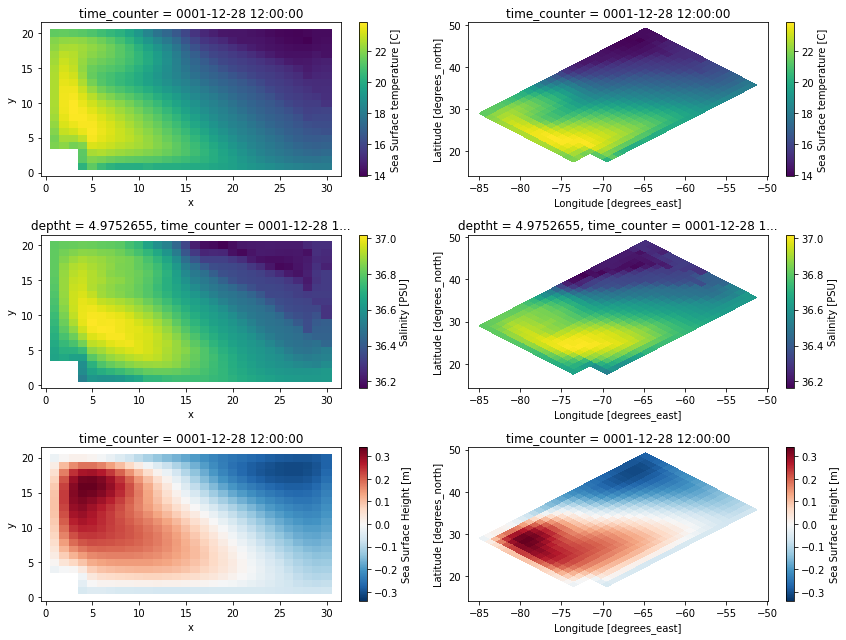

In [19]:
fig, ax = plt.subplots(3, 2, figsize=(12, 9))

sst.isel(time_counter=-1).plot(ax=ax[0, 0], x="x", y="y")
sst.isel(time_counter=-1).plot(ax=ax[0, 1], x="nav_lon", y="nav_lat")

sss.isel(time_counter=-1).plot(ax=ax[1, 0], x="x", y="y")
sss.isel(time_counter=-1).plot(ax=ax[1, 1], x="nav_lon", y="nav_lat")

ssh.isel(time_counter=-1).plot(ax=ax[2, 0], x="x", y="y")
ssh.isel(time_counter=-1).plot(ax=ax[2, 1], x="nav_lon", y="nav_lat")

fig.tight_layout();

## Compress and decompress data

In [20]:
from ctypes import cdll
cdll.LoadLibrary('/home/jovyan/pysz/lib/libSZ.so')
cdll.LoadLibrary('/home/jovyan/pysz/lib/libzstd.so')

import pysz
import sys

import numpy as np

In [25]:
def compress_decompress_data_array(da, pwre=1e-7):
    # Code from https://github.com/szcompressor/SZ/blob/master/example/test.py
    compressor = pysz.Compressor((pysz.ConfigBuilder().errorBoundMode(pysz.PW_REL)
                                      .pw_relBoundRatio(pwre).build()))
    
    zexact = da.data
    zcomp = compressor.Compress(zexact)
    z_szw = compressor.Decompress(zcomp, zexact.shape, da.dtype)
    
    da_reconstructed = xr.zeros_like(da)
    da_reconstructed.data = z_szw

    ratio_szw = zexact.nbytes / sys.getsizeof(zcomp)
    pwre_szw = np.max(np.abs(zexact - z_szw) / np.abs(zexact))
    
    print(f'Compression ratio for SZ wrapper: {ratio_szw:.2}')
    print(f'Pointwise relative error for SZ wrapper: {pwre_szw:.2e}')

    return da_reconstructed

In [43]:
sst_rec = compress_decompress_data_array(sst.where(~sst.isnull(), other=999)).where(~sst.isnull())

Compression ratio for SZ wrapper: 1.7
Pointwise relative error for SZ wrapper: 1.00e+00


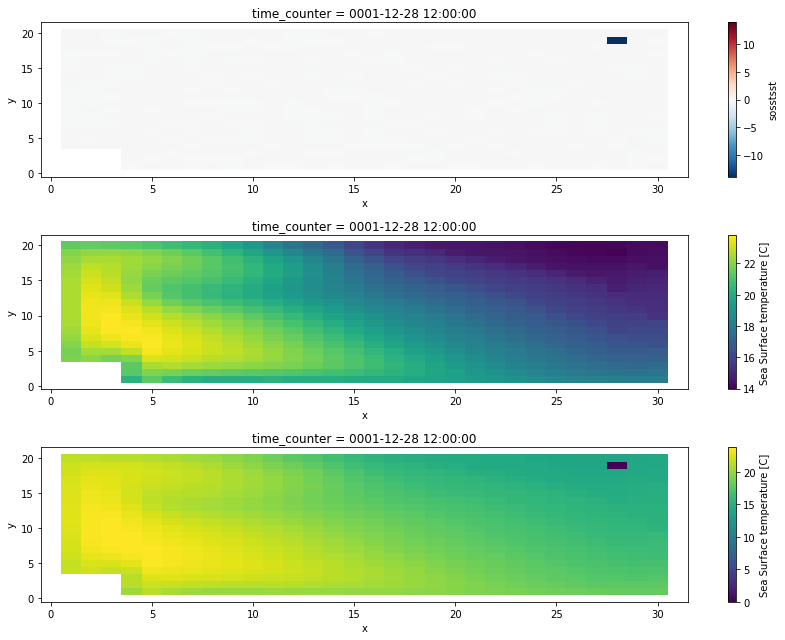

In [49]:
fig, ax = plt.subplots(3, 1, figsize=(12, 9))

(sst_rec - sst).isel(time_counter=-1).plot(ax=ax[0], x="x", y="y")
sst.isel(time_counter=-1).plot(ax=ax[1], x="x", y="y")
sst_rec.isel(time_counter=-1).plot(ax=ax[2], x="x", y="y")

fig.tight_layout();

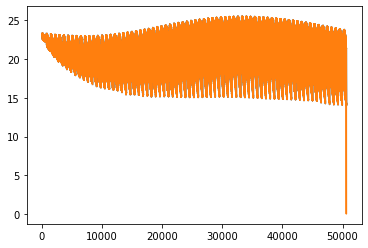

In [52]:
plt.plot(sst.data.flat)
plt.plot(sst_rec.data.flat)